# Solving the Cracker Barrel Peg Game with an Algorithm
> Objective: Simulate and Solve the Cracker Barrel Peg Game
1. Create a working peg game
    - 1a. Create a Graph that represents the nodes of the peg game
    - 1b. Create a method to determine if the node contains a peg
    - 1c. Create a function that evaluates if a move is legal (ie a viable jump)
    - 1d. Create a function that evaluates if any legal moves are available (successor function)
    - 1e. Create a scoring function
    - 1f. Create a random actor so that we can calculate probability of winning at random
2. Use Naive Search (BFS or DFS) to Solve the Peg Game & Return the Winning Sequence Of Moves
3. Visualize the Winning Sequence

# Step 1: Represent the Peg Game

In [1]:
import numpy as np
import networkx as nx
import random
import pandas as pd

# Step 1a - create the graph and edges

In [3]:
# create a function to initiate the peg positions, returned as a dictionary of nodes and binary status 0 = no peg , 1= peg
def init_peg_dict(starting_missing_peg=0):
    # Create our Nodes/Holes - theoretically you can use the layers argument to make your peg board larger
    # 5 Layers recreates teh iconic cracker barrel peg game
    nodes = []
    layers = 5
    for i in range(layers):
        n = i + 1
        for j in range(n):
            if len(nodes)==0:
                nodes.append(0)
            else:   
                next_node = max(nodes)
                nodes.append(next_node+1)
    #now that I have my nodes/holes, lets create a dictionary where the key is the hole and value is 1 (has peg) 0 (no peg here)
    peg_dict = {}
    for n in nodes:
        key = n
        if n == starting_missing_peg:
            val = 0
        else:
            val = 1
        peg_dict[key] = val

    return peg_dict
peg_dict = init_peg_dict(0)

In [3]:
# now we need to organzie our nodes into layers (probably other ways to create this graph, but this is how my brain wanted to solve it)
# I refuse to use chat gpt
single_layer = []
temp_nodes = nodes.copy()
layers_list = []
for layer in range(layers):
    n = layer + 1
    single_layer = temp_nodes[:n]
    del temp_nodes[:n]
    layers_list.append(single_layer)
#layers are rows of nodes in our triangle
layers_list

[[0], [1, 2], [3, 4, 5], [6, 7, 8, 9], [10, 11, 12, 13, 14]]

In [4]:
#to create our edges, I figured that I could loop through all nodes and determine if there was a viable connection
#based on the variance to other nodes across or within layers (ie if the other node is more than 1 layer away, no edge, etc.)

# simple function to return the layer indices of a given node
def return_indeces(node):
    for l in layers_list:
        for n in l:
            if node == n:
                layer_index = layers_list.index(l)
                row_index = l.index(n)
                return layer_index, row_index
            
# now we loop through all combinations and evaluate if there's a viable connection/edge       
all_edges = []
for n in nodes:
    for n2 in nodes:
        if n != n2:
            layer_index, row_index = return_indeces(n)
            layer_index2, row_index2 = return_indeces(n2)
            #to be a valid edge two things must be true, layer index variance must be -1 or zero and row var must be 0 or 1
            layer_var = layer_index-layer_index2
            row_var = row_index - row_index2
            if layer_var in[-1,0] and row_var in [0,-1]:
                edge = (n,n2)
                #test if we have the inverse already - may need to remove this if edges need to be bi-directional
                if (n2,n) not in all_edges:
                    all_edges.append(edge)
#display a few of our edges
all_edges[0:10]

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 6),
 (3, 7)]

In [5]:
# okay now we want to create a dictionary of xy coordinates to specify our layout

#lets assume node zero is the starting point x=0,y=0 and edge len =1

#iterate through each layer
# y of each layer = edge len * layer index + starting y
# x of each node = is either x of prior node + edge len OR when layer index = 0 then x= .5 * edge len * layer index
edge_len = 1
coords_dict ={}
# iterate through layer list
for l in layers_list:
    for n in l:
        key = n
        # to get y i need the layer times the edge len
        layer_index = layers_list.index(l)
        y = layer_index * edge_len * -1 *.86666 #.866 is the height of an equallateral triangle relative to the size
        # to get x, I need the edge index
        edge_index = l.index(n)
        layer_start_x = .5*edge_len * layer_index * -1
        if edge_index != 0:
            x = layer_start_x + edge_index * edge_len
        else:
            x= layer_start_x

        coords_dict[key] = (x,y)

coords_dict


{0: (-0.0, 0.0),
 1: (-0.5, -0.86666),
 2: (0.5, -0.86666),
 3: (-1.0, -1.73332),
 4: (0.0, -1.73332),
 5: (1.0, -1.73332),
 6: (-1.5, -2.59998),
 7: (-0.5, -2.59998),
 8: (0.5, -2.59998),
 9: (1.5, -2.59998),
 10: (-2.0, -3.46664),
 11: (-1.0, -3.46664),
 12: (0.0, -3.46664),
 13: (1.0, -3.46664),
 14: (2.0, -3.46664)}

# Visualize our Graph

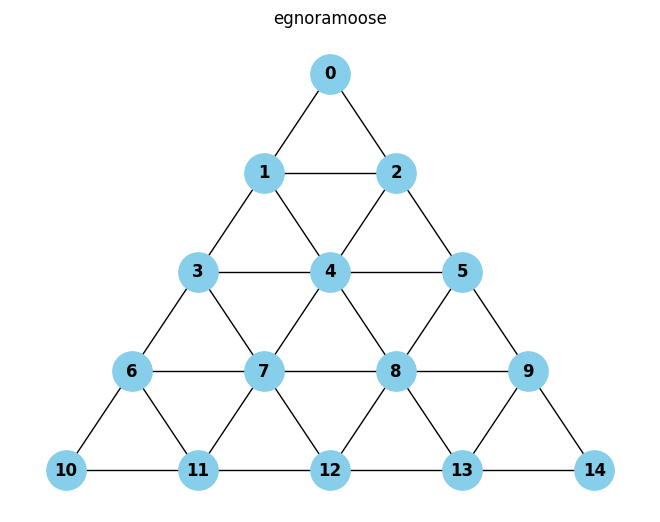

In [6]:
#Visualize our graph

import matplotlib.pyplot as plt
#visualize our graph

#init the graph
G = nx.Graph()
#add our nodes and edges
G.add_nodes_from(nodes)
G.add_edges_from(all_edges,lengths=10)

#set explicit coords
loc = coords_dict


# Draw the graph
nx.draw(G,pos = loc, with_labels=True, node_color='skyblue', node_size=800, font_size=12, font_weight='bold')

# Display the graph
plt.title("egnoramoose")
plt.show()

# Setup a Method to determine whether the node/hole contains a peg

In [7]:
# create a function to initiate the peg positions, returned as a dictionary of nodes and binary status 0 = no peg , 1= peg
def init_peg_dict(starting_missing_peg=0):
    peg_dict = {}
    for n in nodes:
        key = n
        if n == starting_missing_peg:
            val = 0
        else:
            val = 1
        peg_dict[key] = val

    return peg_dict
peg_dict = init_peg_dict(0)

#create a function to remove a peg from the dictionary by passing the function a node
def remove_peg(node,peg_dict):
    peg_dict[node] = 0
    return peg_dict

In [8]:
#remove one peg with our new functions
peg_dict = remove_peg(10,peg_dict)

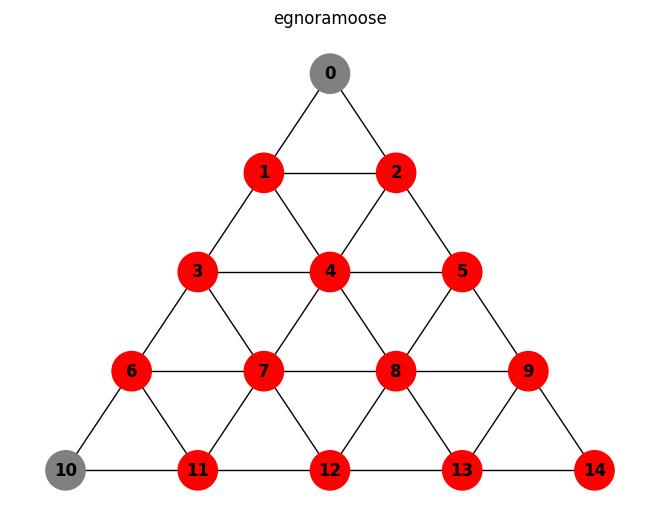

In [9]:
# Draw the graph
nx.draw(G,pos = loc, with_labels=True, node_color=['grey' if peg_dict[n] == 0 else 'red' for n in G.nodes()], node_size=800, font_size=12, font_weight='bold')
# Display the graph
plt.title("egnoramoose")
plt.show()

# Create a Function to determine if a Move is Legitimate

In [10]:
#calc distance between two nodes
def calc_dist(start_node,end_node):
    start_x, start_y = coords_dict[start_node]
    end_x, end_y = coords_dict[end_node]
    dist = np.sqrt((start_x - end_x)**2 + (start_y-end_y)**2)
    dist = round(dist,1)
    return dist

# to find out if a move is legit, we need to get a list of edges that include a given node
def create_list_of_edges_that_contain_node(n):
    edge_list = []
    for e in all_edges:
        if n in e:
            edge_list.append(e)
    return edge_list 

# given two nodes with distance of 2 (ie adjacent)
# return the node that sits between them
# should return none if distance !=2
def find_middle_node(node_1,node_2):
    #first test if the distance = 2
    dist = calc_dist(node_1,node_2)
    if dist == 2:
        #create two lists of edges that contain our start and end nodes
        list1 = create_list_of_edges_that_contain_node(node_1)
        list2 = create_list_of_edges_that_contain_node(node_2)
        #then compare our lists to determine which node is included in both lists
        stripped_list_1 = []
        #now strip off the matching nodes
        for e in list1:
            for n in e:
                if n != node_1:
                    stripped_list_1.append(n)
        #now we do the same thing for list 2
        stripped_list_2 =[]
        for e in list2:
            for n in e:
                if n != node_2:
                    stripped_list_2.append(n)

        #now find the node that exists in both lists
        for n in stripped_list_1:
            if n in stripped_list_2:
                middle_node = n
        return middle_node

#combine the above functions to determine if a given combinations of nodes can return a legit move    
def test_legal_move(start_node,end_node,peg_dict):
    #return a binary of 1 if move is valid
    #init the binary variable that we will return
    binary = 0
    #capture all of the information we need to determine legality
    # start node peg status
    start_node_peg = peg_dict[start_node]
    # final node peg status
    end_node_peg = peg_dict[end_node]
    
    #lets test a few assumptions before calling anymore functions
    if start_node_peg == 1 and end_node_peg == 0:

        #okay if those are valid, lets find the middle node and 


    
    
        #if start_node peg binary = 1
        if start_node_peg == 1:
            #if end node peg binary ==0 (ie we have a peg to jump in our middle node)
            if end_node_peg == 0:
                # if the destination node is open
                # and the dist between start and end node is 2 
                dist = calc_dist(start_node,end_node)
                if dist == 2:
                    #if the middle node peg = 1
                    middle_node = find_middle_node(start_node,end_node)
                    middle_node_peg = peg_dict[middle_node]
                    if middle_node_peg == 1:
                        binary = 1
        return binary
                        

def create_list_of_current_legal_moves(peg_dict):
    legal_moves = []
    occupied_nodes = [key for key in peg_dict.keys() if peg_dict[key]==1]
    empty_nodes = [n for n in peg_dict.keys() if peg_dict[n]==0]
    for o in occupied_nodes:
        for e in empty_nodes:
            if test_legal_move(o,e,peg_dict)==1:
                legal_moves.append((o,e))
    return legal_moves



In [11]:
create_list_of_current_legal_moves(peg_dict)

[(3, 0), (3, 10), (5, 0), (12, 10)]

In [ ]:
[]

In [237]:
def scoring_label(n_pegs):
    #return the scoring label as a string based on the number of remaining pegs
    if n_pegs == 1:
        return 'You\'re a Genius'
    elif n_pegs == 2:
        return 'Purty Smart'
    elif n_pegs == 3:
        return 'You\'re Just Plain Dumb'
    else:
        return 'Eg-no-ra-moose'

#create a function to draw a grid
def draw_board(peg_dict):
    # Draw the graph
    nx.draw(G,pos = loc, with_labels=True, node_color=['#e63946' if peg_dict[n] == 0 else '#a8dadc' for n in G.nodes()], node_size=800, font_size=12, font_weight='bold')
    # Display the graph
    n_pegs = sum(peg_dict.values())
    plt.title(scoring_label(n_pegs))
    plt.show()

def draw_move(peg_dict,move):
    #define some colors
    start_node_color = '#457b9d'
    end_node_color = '#e07a5f'
    empty_hole_color = '#e63946' 
    full_hole_colore = '#a8dadc'
    #now init a list of colors
    col_list = []
    #now create our color list
    for hole in peg_dict.keys():
        if hole == move[0]:
            col_list.append(start_node_color)
        elif hole == move[1]:
            col_list.append(end_node_color)
        elif peg_dict[hole] == 1:
            col_list.append(full_hole_colore)
        else:
            col_list.append(empty_hole_color)

    # Draw the graph
    #need to create an array of colors where the pegs are green if they are part of the move
    #red if empty 
    #otherwise grey
    nx.draw(G,pos = loc, with_labels=True, node_color=col_list, node_size=800, font_size=12, font_weight='bold')
    # Display the graph
    plt.title(f"Move {move[0]} to {move[1]}")
    plt.show()

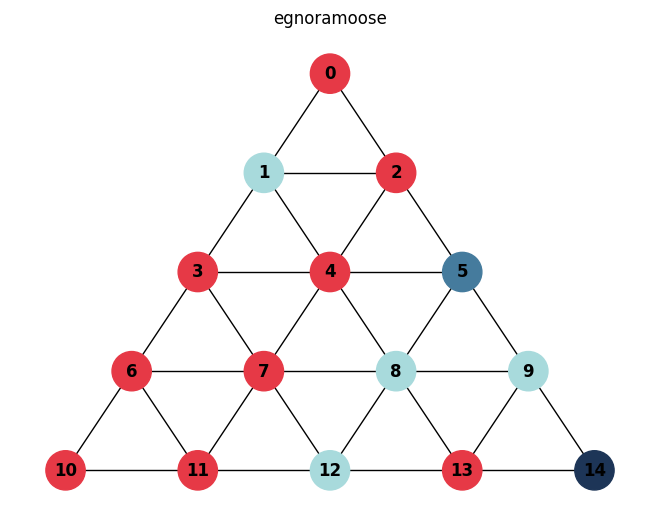

In [184]:
draw_move(peg_dict,create_list_of_current_legal_moves(peg_dict)[0])

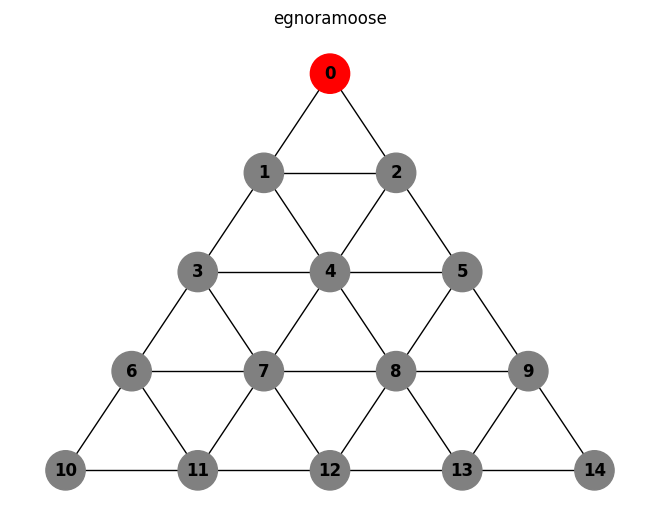

In [13]:
draw_board(init_peg_dict())

In [14]:
#create a function to select a legal move at random
def select_random_move(peg_dict):
    legal_moves = create_list_of_current_legal_moves(peg_dict)
    n_moves = len(legal_moves)
    if n_moves > 0:
        y = random.randint(0,n_moves-1)
        move = legal_moves[y]
        #leaving this in the if means the function returns nothing when there are no legal moves
        return move

In [15]:
#now we need to create a function to process a move,
# so we pass it a legal move and the peg dict and it changes the peg dict in two ways
# first node in the move tuple is now empty
# middle node is now empty 
# second node in the tuple has a peg
# then return the updated dict
def process_move(peg_dict,move):
    #create a new peg dictionary to keep them straigh (probably not efficient)
    new_dict = peg_dict
    #now we need to make the first node in our move tuple empty
    new_dict[move[0]] = 0 
    #now we need to find the middle node and make empty
    jumped_node = find_middle_node(move[0],move[1])
    new_dict[jumped_node] = 0
    #the make the destination have a peg
    new_dict[move[1]] = 1

    #return new dict means that your game loop is going to need to set dict to this output
    return new_dict
    

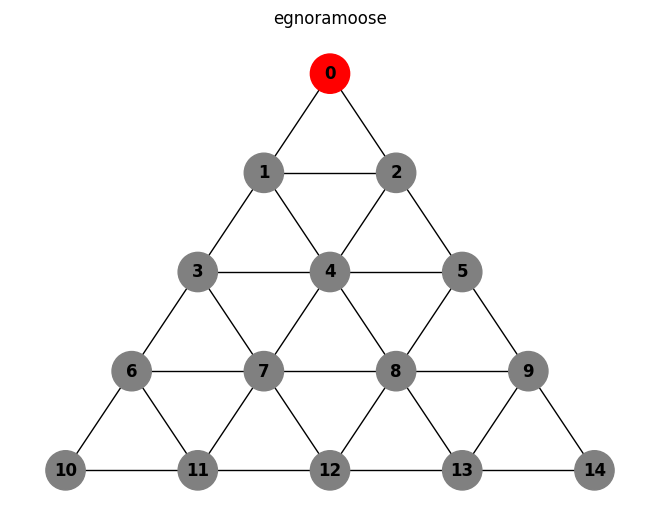

(3, 0)


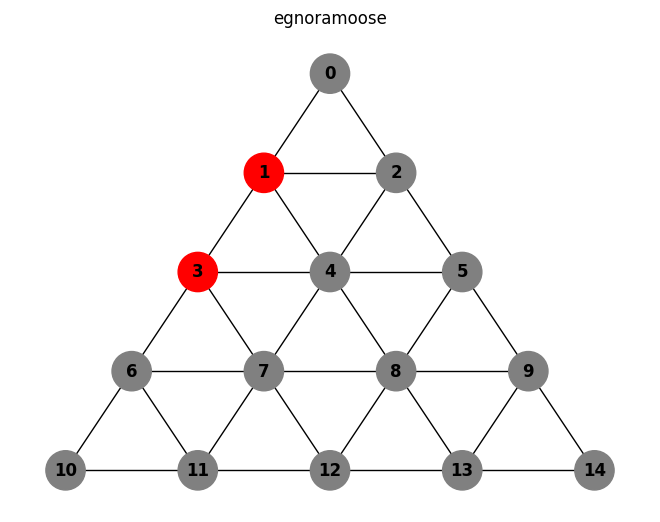

In [16]:
#lets show how this works
peg_dict = init_peg_dict()
draw_board(peg_dict)

#now select a random move
move = select_random_move(peg_dict)
print(move)
#now process it to a new dictionary
new_peg_dict = process_move(peg_dict,move)

#and draw it
draw_board(new_peg_dict)

# Random Game Loop
1. Initiate the board
2. detect legal moves
3. if legal moves exist, select a legal move
4. pass the move to the 
5. Output is a list of peg dictionaries

In [17]:
def run_random_game():
    peg_location_list = []
    move_num = 0
    move_num_list= []
    move_list = []
    peg_dict = init_peg_dict()
    #add the starting values to our lists
    peg_location_list.append(peg_dict.copy())
    move_num_list.append(move_num)
    move_list.append(None)
    #init a variable called legal_move_ct 
    legal_move_ct = len(create_list_of_current_legal_moves(peg_dict))
    while legal_move_ct > 0:
        move_num += 1
        move = select_random_move(peg_dict)
        move_num_list.append(move_num)
        move_list.append(move)
        peg_dict = process_move(peg_dict,move)
        peg_location_list.append(peg_dict.copy())
        legal_move_ct = len(create_list_of_current_legal_moves(peg_dict))
        # print(legal_move_ct)
    return move_num_list, move_list, peg_location_list
    
    
    

In [18]:
n, moves, peg_locs = run_random_game()

0
None


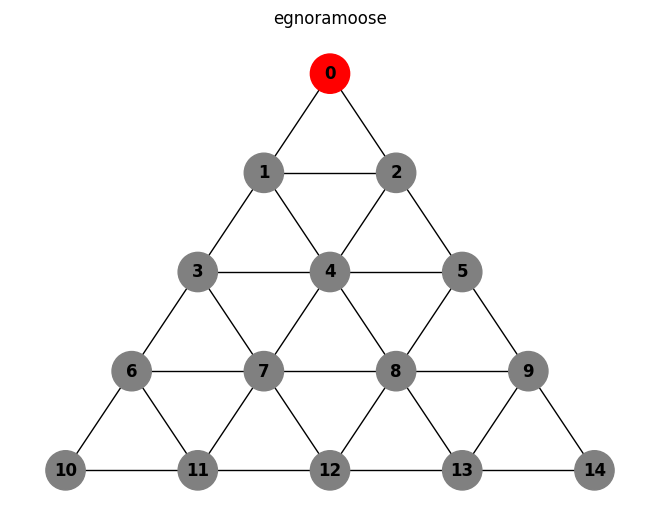

1
(5, 0)


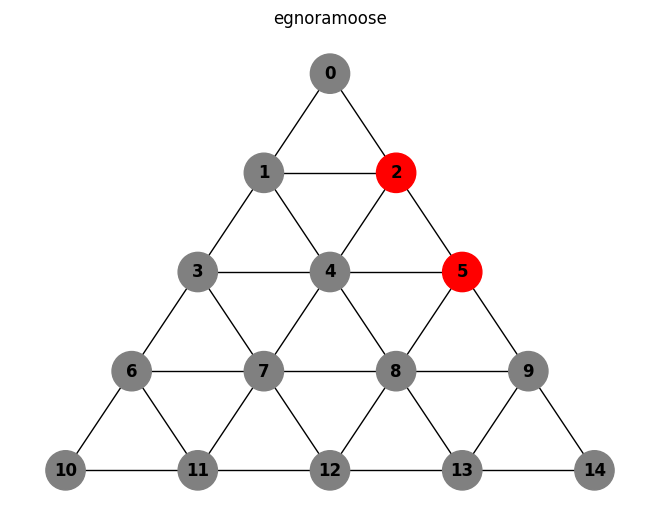

2
(3, 5)


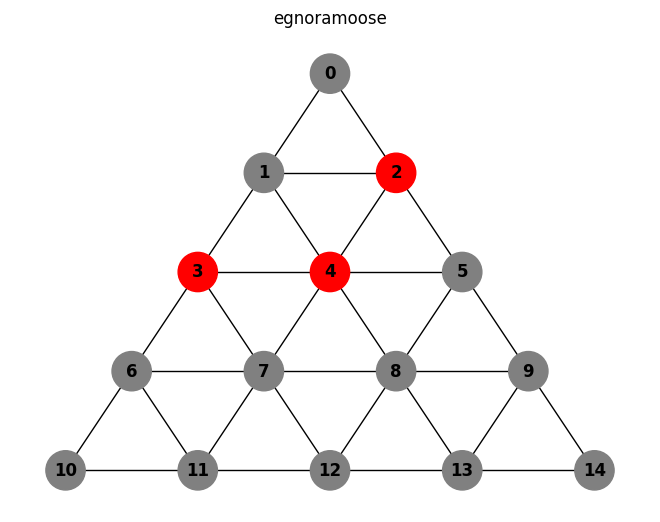

3
(10, 3)


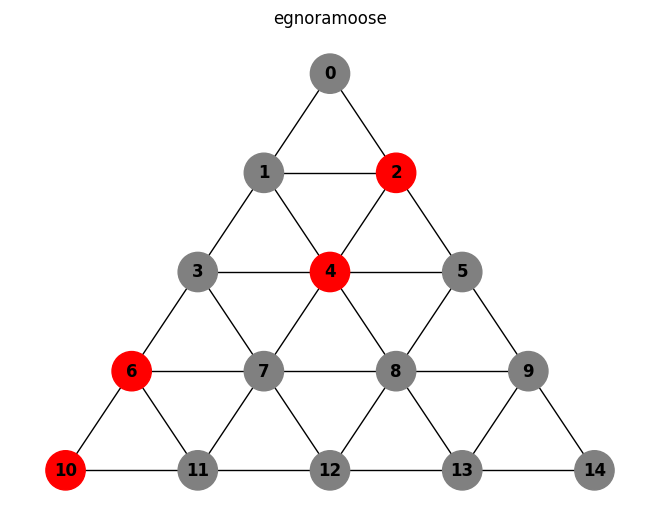

4
(11, 4)


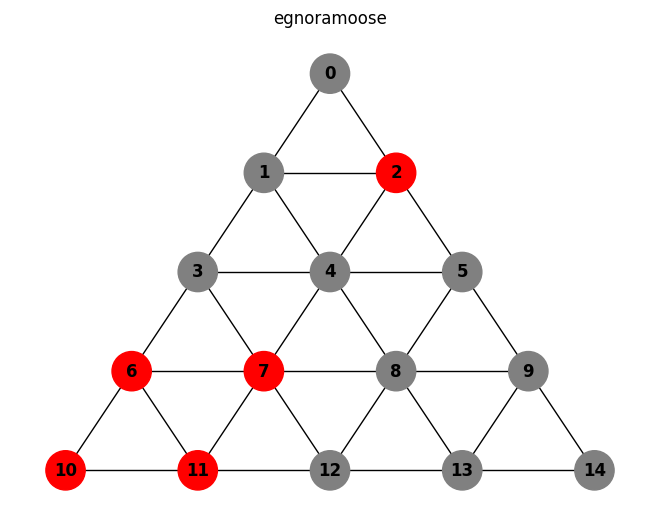

5
(9, 7)


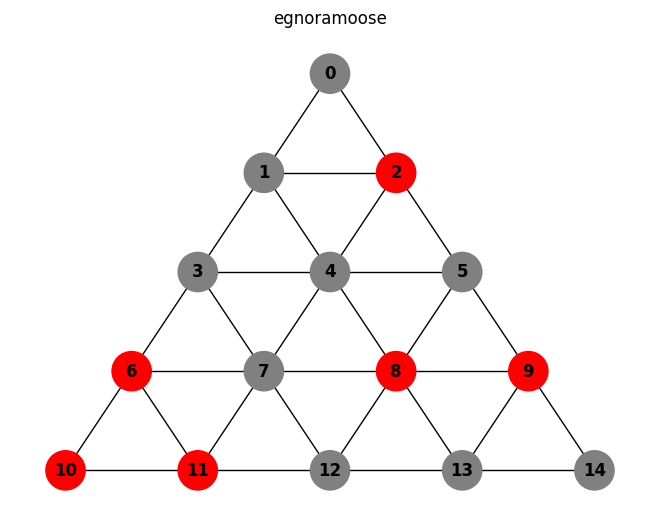

6
(1, 8)


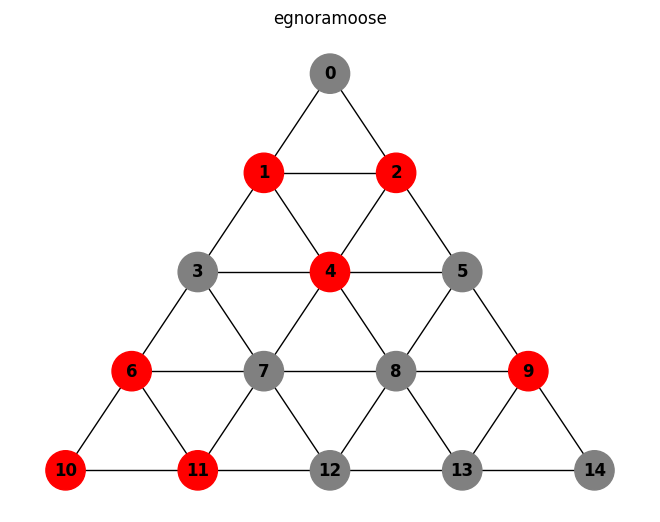

7
(7, 9)


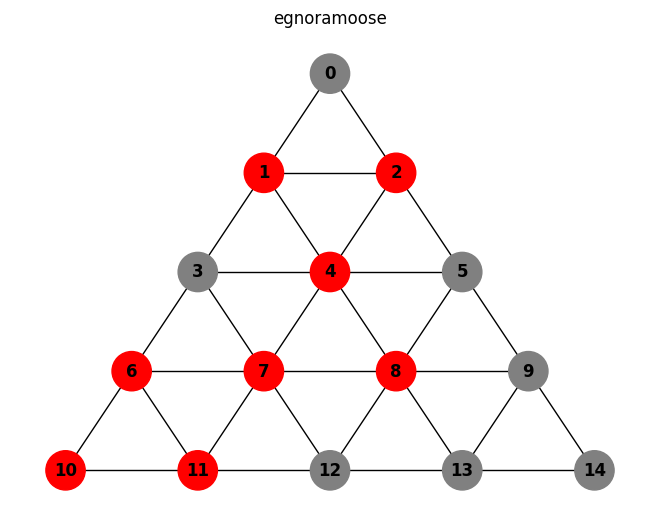

8
(13, 11)


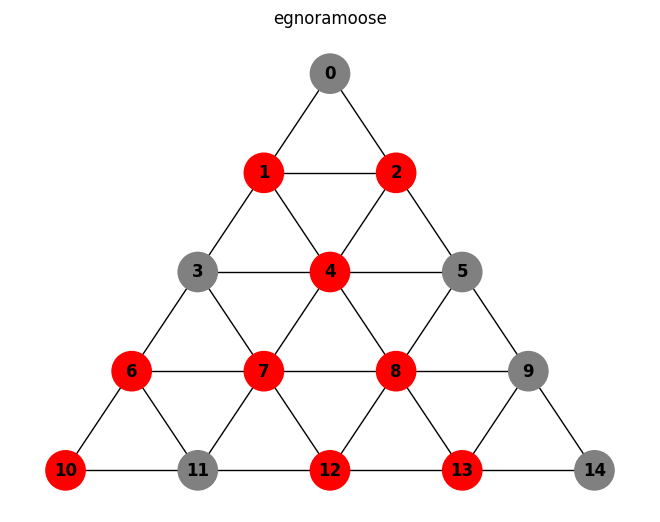

9
(9, 2)


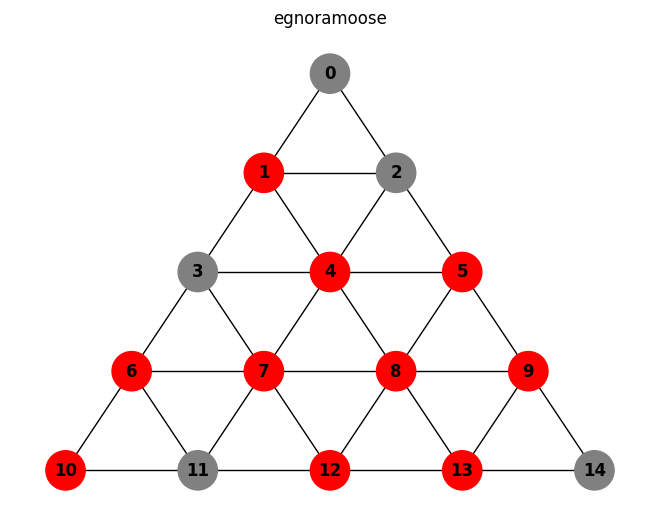

10
(0, 5)


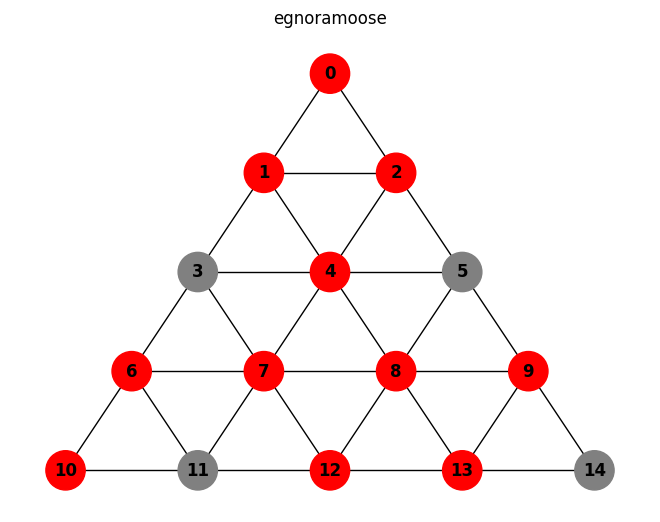

In [19]:
for i in range(len(n)):
    print(i)
    print(moves[i])
    draw_board(peg_locs[i])

In [20]:
len(n)

11

# Alright so now we can simulate ranom games to determine the p of winning by chance

In [21]:
run_number = []
run_result = []

for i in range(1000):
    n, moves, peg_locs = run_random_game()
    #figure out the remaining pegs by summing they keys in the in the final peg dictionary
    remaining_pegs = sum(peg_locs[-1].values())
    run_number.append(i)
    run_result.append(remaining_pegs)


df = pd.DataFrame({"run_no":run_number,
                    "remaining_pegs":run_result})

In [22]:
import plotly.express as px
fig = px.histogram(df,x='remaining_pegs',width=500,template='simple_white')
fig.show()

# can we create a bfs that returns the solution

In [238]:
def return_peg_count(peg_dict):
    return sum(peg_dict.values())
def test_winning_move(move,peg_dict):
    #return true if a proposed move is a win
    #so peg count = 2
    # and the move is valid
    return test_legal_move(move[0],move[1],peg_dict)==1 and return_peg_count(peg_dict)==2



In [104]:
test_winning_move((14,12),peg_dict)

True

In [243]:
#define the search algorithm 
def search(peg_dict):
    #init fringe
    fringe = []
    #add our starting state to the fringe, leave an empty list for the move list
    fringe.append((peg_dict,[]))
    while fringe:
        #examine a state by poping it off the fringe
        #note I tried this as a bfs with pop(0) and it took 7 minutes instead of 2 seconds
        current_state = fringe.pop()
        #get a list of valid moves from this successor function
        moves = create_list_of_current_legal_moves(current_state[0])
        for move in moves:
            #if one of the moves results in a win
            if test_winning_move(move,current_state[0]):
                #add the move to the move list
                current_state[1].append(move)
                # return the list of moves that lead to the win
                return current_state[1]
            else:
                # if this isn't a winning move, we process it, append the move to the move list and add it to the fringe
                #updated state is basically a new state and move list
                updted_state = current_state[0].copy()
                #process the move, ie jump the peg and remove it
                updated_state = process_move(updted_state,move)
                #add this move to the list
                updated_move_list = current_state[1].copy()
                updated_move_list.append(move)
                #add this branch to the fringe 
                fringe.append((updated_state,updated_move_list))

     
test_pegs = init_peg_dict()
# draw_board(test_pegs)
winning_moves = search(test_pegs)
winning_moves

[(5, 0),
 (14, 5),
 (7, 9),
 (9, 2),
 (1, 8),
 (13, 4),
 (11, 13),
 (6, 1),
 (2, 7),
 (0, 3),
 (3, 12),
 (13, 11),
 (10, 12)]

# bookmark

current legal moves [(3, 0), (5, 0)]
remaining pegs = 14
selected move:(5, 0)


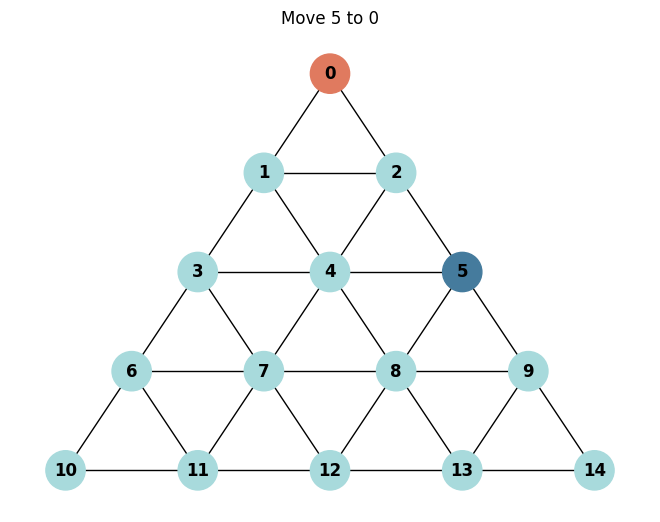

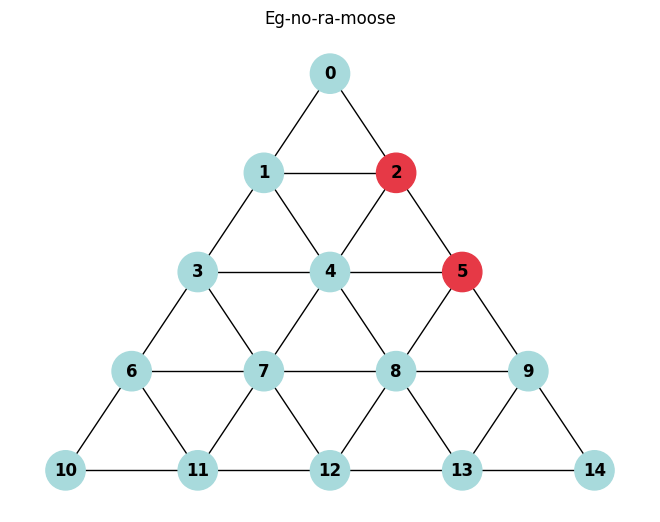

current legal moves [(3, 5), (7, 2), (12, 5), (14, 5)]
remaining pegs = 13
selected move:(14, 5)


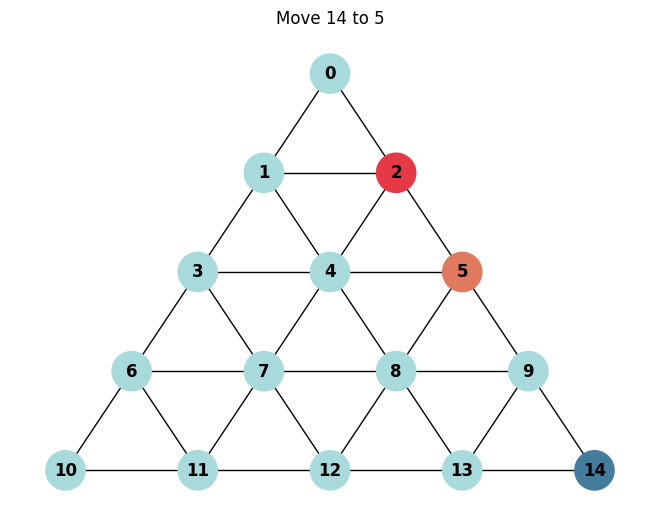

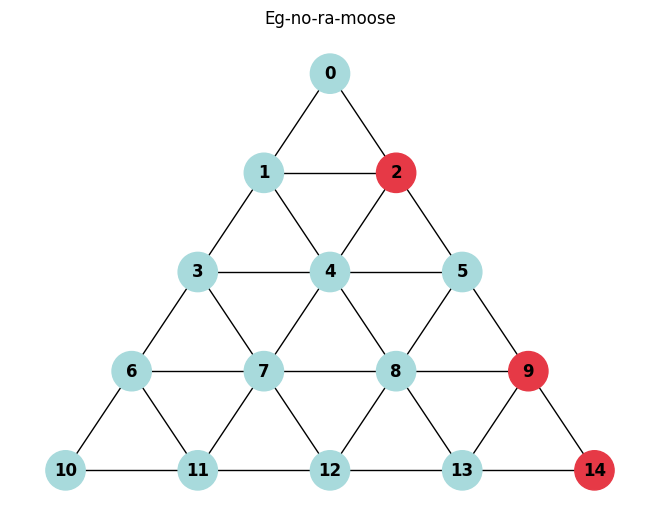

current legal moves [(7, 2), (7, 9), (12, 14)]
remaining pegs = 12
selected move:(7, 9)


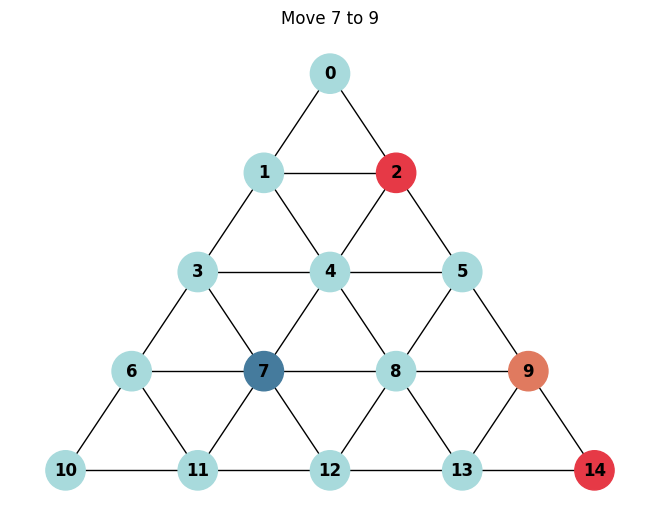

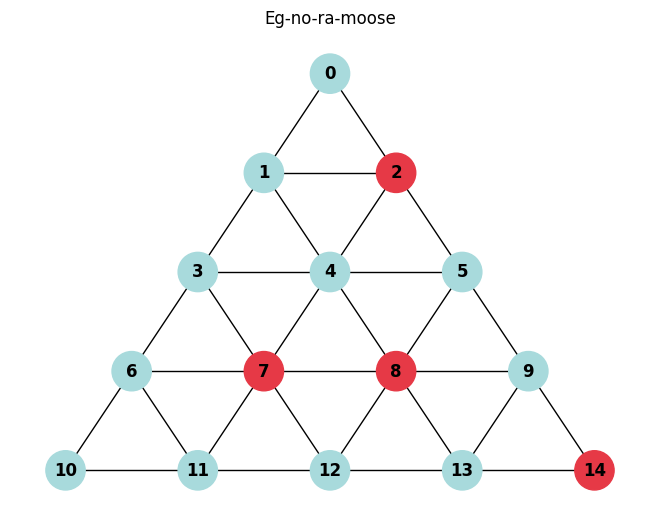

current legal moves [(1, 8), (5, 14), (9, 2), (12, 14)]
remaining pegs = 11
selected move:(9, 2)


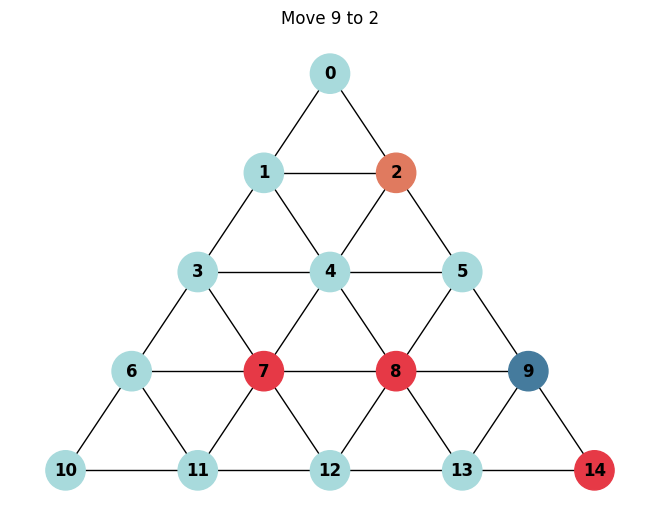

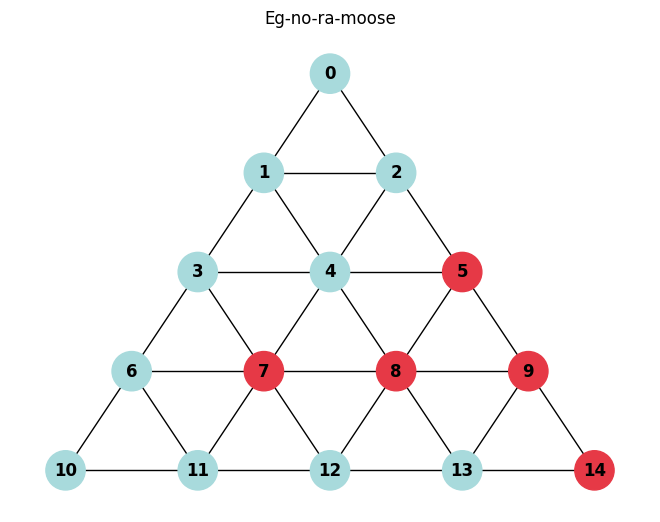

current legal moves [(0, 5), (1, 8), (2, 7), (3, 5), (12, 14)]
remaining pegs = 10
selected move:(1, 8)


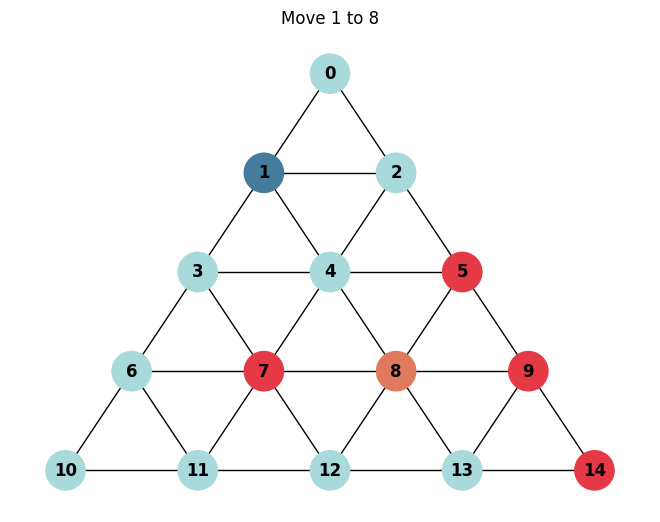

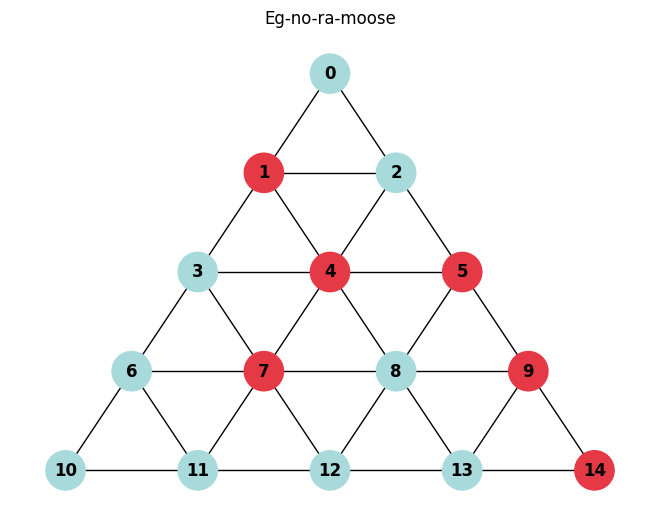

current legal moves [(0, 5), (6, 1), (12, 5), (12, 14), (13, 4)]
remaining pegs = 9
selected move:(13, 4)


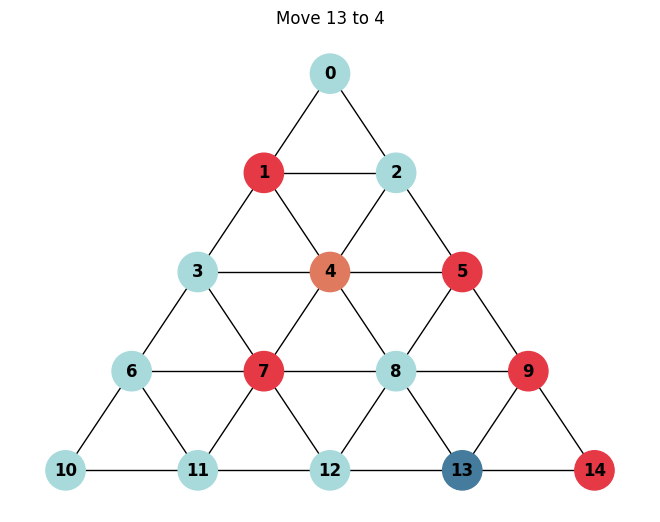

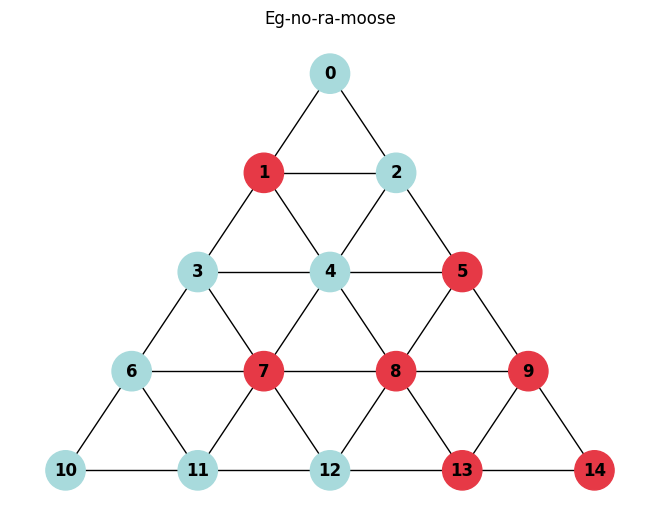

current legal moves [(0, 5), (2, 7), (3, 5), (6, 1), (11, 13)]
remaining pegs = 8
selected move:(11, 13)


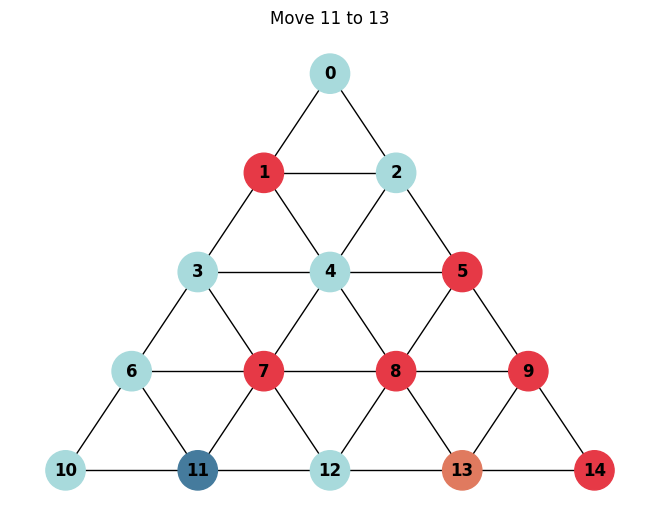

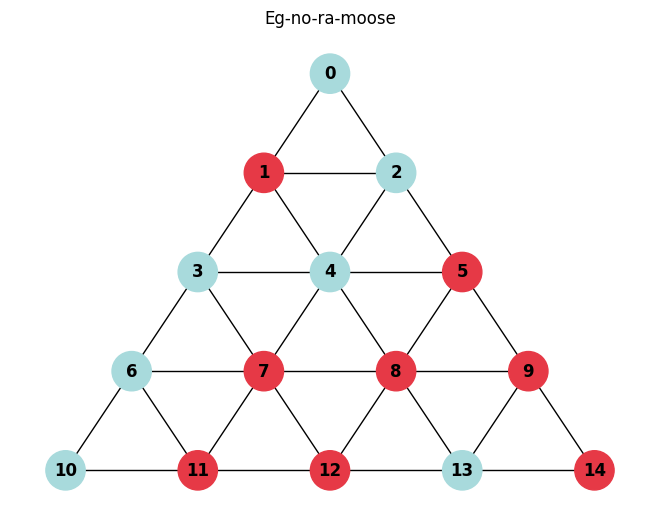

current legal moves [(0, 5), (2, 7), (3, 5), (6, 1)]
remaining pegs = 7
selected move:(6, 1)


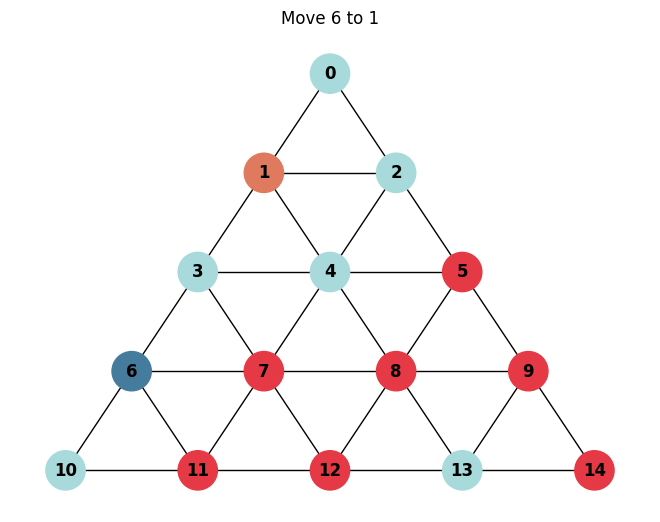

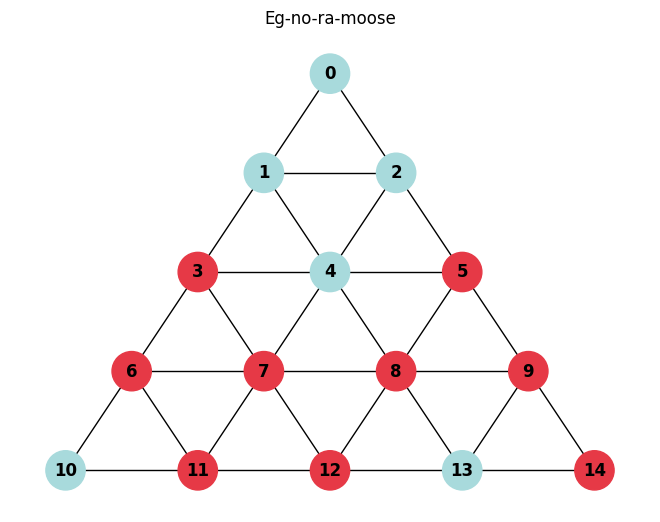

current legal moves [(0, 3), (0, 5), (1, 8), (2, 7)]
remaining pegs = 6
selected move:(2, 7)


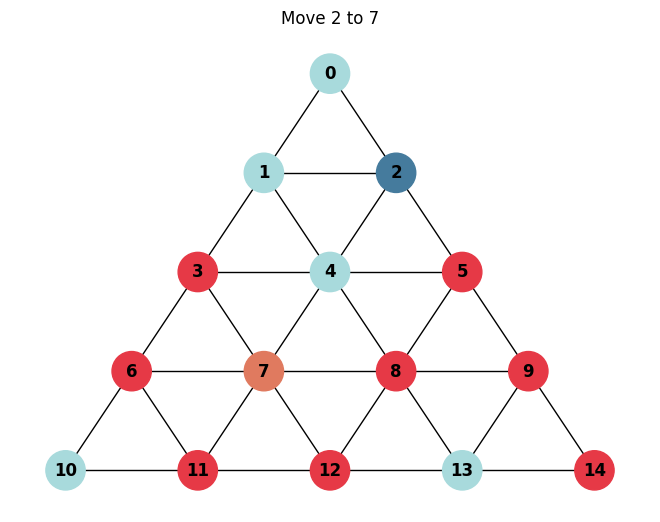

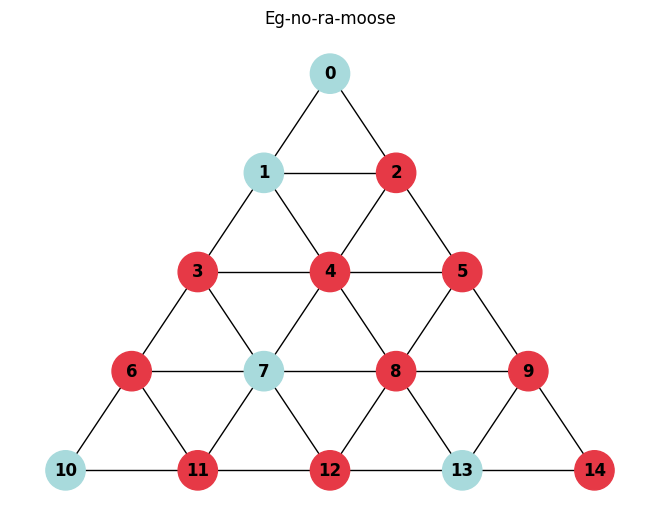

current legal moves [(0, 3)]
remaining pegs = 5
selected move:(0, 3)


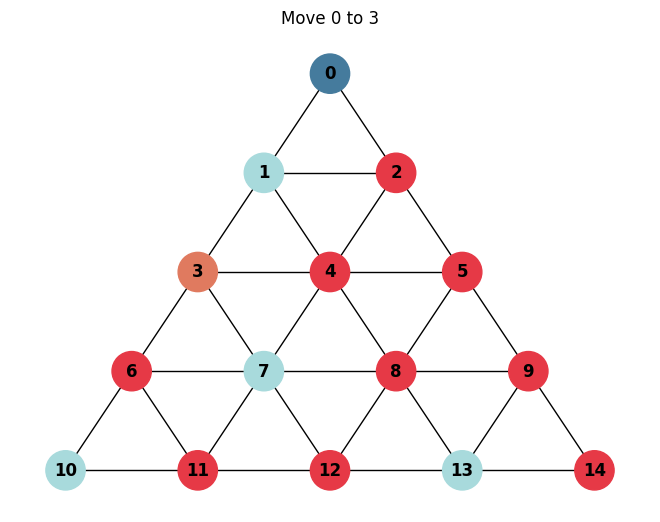

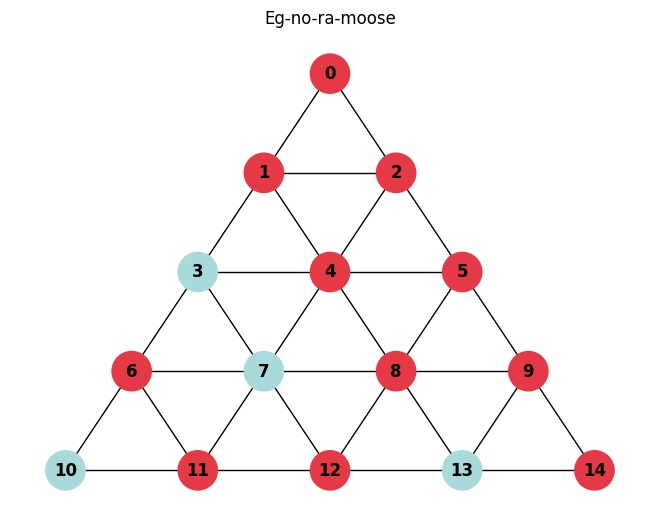

current legal moves [(3, 12)]
remaining pegs = 4
selected move:(3, 12)


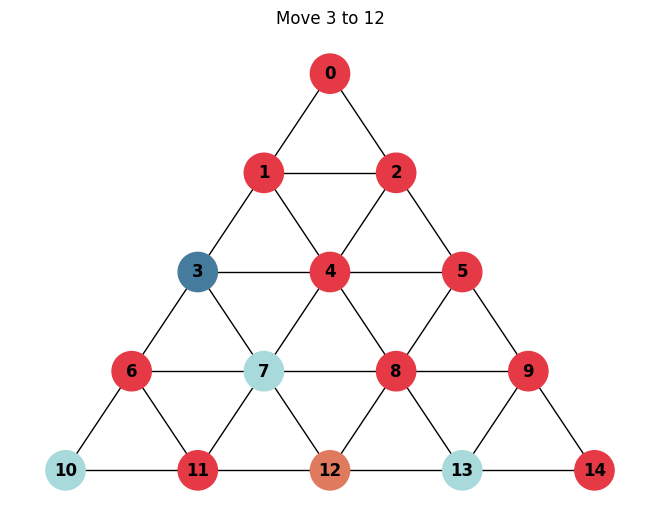

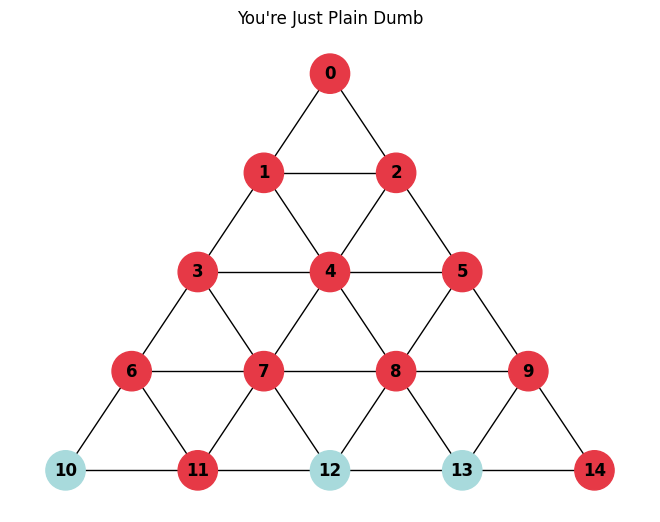

current legal moves [(12, 14), (13, 11)]
remaining pegs = 3
selected move:(13, 11)


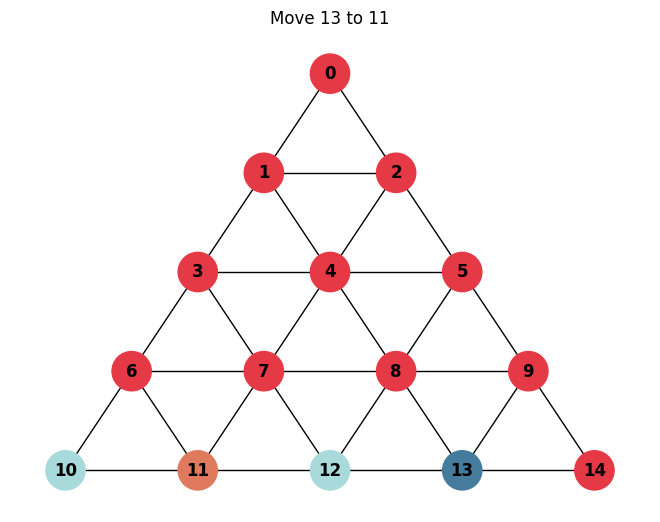

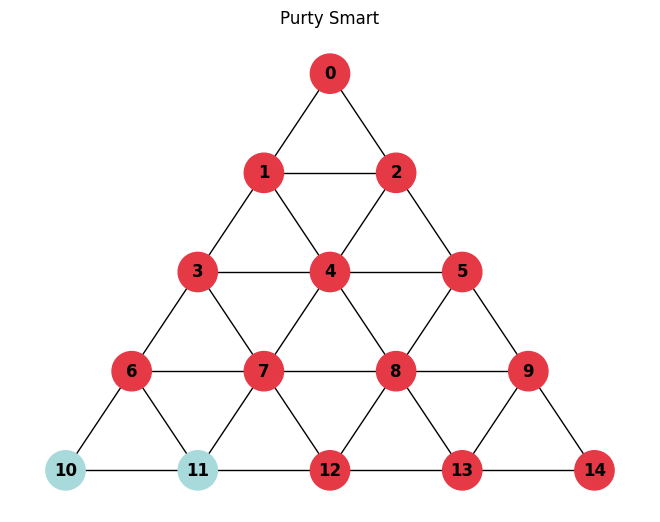

current legal moves [(10, 12)]
remaining pegs = 2
selected move:(10, 12)


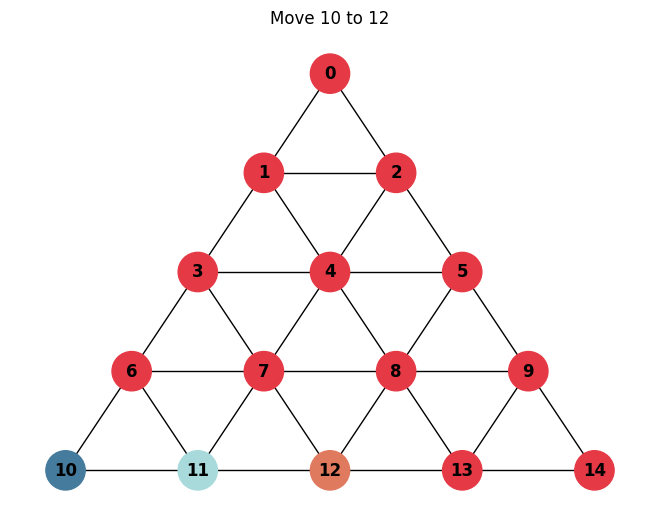

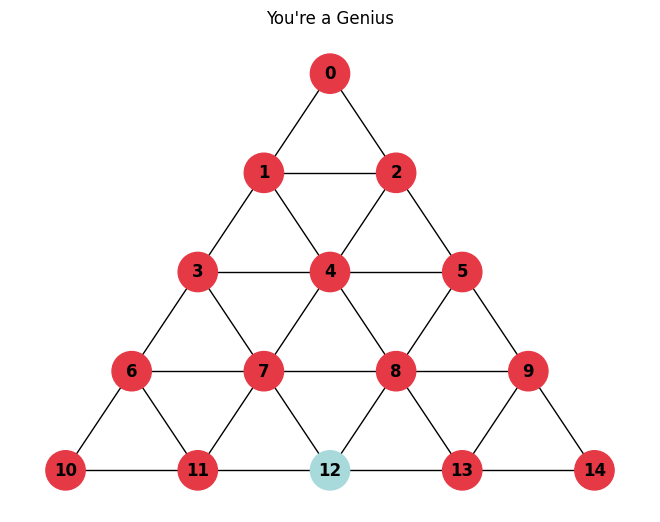

In [244]:

winning_moves = search(init_peg_dict())
new_game = init_peg_dict()
for move in winning_moves:
    print(f"current legal moves {create_list_of_current_legal_moves(new_game)}")
    print(f'remaining pegs = {return_peg_count(new_game)}')
    print(f"selected move:{move}")
    draw_move(new_game,move)
    new_game = process_move(new_game,move)
    draw_board(new_game)